
# Разработка решения, позволяющее оптимизировать управление персоналом, для HR-аналитики компании «Работа с заботой»
_____
**Описание исследования.**

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.
Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли.
У нас будет несколько задач: Первая — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.
Вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.    
_____
**Цель исследования.**

Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 

Построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.
_____

**Исходные данные.**    

Для 1 задачи.

Тренировочная выборка: *train_job_satisfaction_rate*

Входные признаки тестовой выборки: *test_features*

Целевой признак тестовой выборки: *test_target_job_satisfaction_rate*

Для 2 задачи.

Тренировочная выборка: *train_quit.csv*

Входные признаки тестовой выборки те же, что и в прошлой задаче: *test_features.csv*

Целевой признак тестовой выборки: *test_target_quit.csv*

id — уникальный идентификатор сотрудника

dept — отдел, в котором работает сотрудник

level — уровень занимаемой должности

workload — уровень загруженности сотрудника

employment_years — длительность работы в компании (в годах)

last_year_promo — показывает, было ли повышение за последний год

last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год

supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель

salary — ежемесячная зарплата сотрудника

job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак
______

**Данное исследование разделим на несколько частей.**

[**Задача № 1**](#section_1)
* [1 Загрузка данных и первичное ознакомление](#1-bullet)
* [2 Предобработка данных](#2-bullet)
* [3 Исследовательский анализ данных](#3-bullet)
* [4 Корреляционный анализ данных](#4-bullet)
* [5 Подготовка данных к обучению и обучение модели](#5-bullet)

[**Задача № 2**](#section_2)
* [6 Загрузка данных и первичное ознакомление](#6-bullet)
* [7 Предобработка данных](#7-bullet)
* [8 Исследовательский анализ данных](#8-bullet)
* [9 Корреляционный анализ данных](#9-bullet)
* [10 Подготовка данных к обучению и обучение модели](#10-bullet)

[**Общий вывод**](#section_3)

In [2]:
pip install phik -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U scikit-learn -q

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn import model_selection, metrics
from sklearn.metrics import make_scorer
import phik
from phik.report import plot_correlation_matrix
from phik import report
from sklearn.impute import SimpleImputer 
from sklearn.ensemble import RandomForestClassifier
import os
import numpy as np

# Задача №1
<a id='section_1'></a>

## Загрузка данных и первичное ознакомление
<a id='1-bullet'></a>

In [5]:
# пути загружаемых датасетов
pth1 = '/datasets/train_job_satisfaction_rate.csv'
pth2 = '/datasets/test_features.csv'
pth3 = '/datasets/test_target_job_satisfaction_rate.csv'

# проверка пути к загружаемым датасетам
if os.path.exists(pth1):
    #загрузка данных из файла 'train_job_satisfaction_rate.csv'
    train_job = pd.read_csv(pth1)
    # отобразим загруженные датасеты
    display(train_job.head())
else:
    print(f"Не верный путь к файлу: {pth1}")
if os.path.exists(pth2):
    #загрузка данных из файла 'test_features.csv'
    test_features = pd.read_csv(pth2)
    # отобразим загруженные датасеты
    display(test_features.head())
else:
    print(f"Не верный путь к файлу: {pth2}")
if os.path.exists(pth3):
    #загрузка данных из файла 'test_target_job_satisfaction_rate.csv'
    test_target_job = pd.read_csv(pth3, sep = ',')
    # отобразим загруженные датасеты
    display(test_target_job.head())
else:
    print(f"Не верный путь к файлу: {pth3}")


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


Данные успешно загружены.

In [6]:
def studying_dataset_data(data, columns):
    """
    Функция для просмотра основной информации датасета и переименования столбцов.
    data - обрабатываемый датасет
    columns - названия столбцов датасета
    """
    columns = columns.str.lower().str.replace(' ', '_').str.replace('-', '_')
    print(data.info())
    return columns

In [7]:
# применение функции studying_dataset_data к датасету train_job
train_job.columns = studying_dataset_data(train_job, train_job.columns)
display(train_job.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB
None


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [8]:
# применение функции studying_dataset_data к датасету test_features
test_features.columns = studying_dataset_data(test_features, test_features.columns)
display(test_features.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB
None


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [9]:
# применение функции studying_dataset_data к датасету test_target_job
test_target_job.columns = studying_dataset_data(test_target_job, test_target_job.columns)
display(test_target_job.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
None


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


**Вывод:** в данных присутствуют пропуски, в будущем думаю стоит от них избавиться. Типы данных в норме. Столбцы были приведены к змеиному регистру, пробелы в названиях столбцов заменены на нижнее подчеркивание.

## Предобработка данных
<a id='2-bullet'></a>

In [10]:
# проверка на явные дупликаты датасета market_file
def data_duplicate(data):
    
    duplicate = data.duplicated().sum()
    if duplicate == 0:
        print('Количество дубликатов в датасете: ', duplicate, '\n')
    else:
        print('Количество дубликатов в датасете: ', duplicate)
        data = data.drop_duplicates()
        if data.duplicated().sum() == 0:
            print('Удаление дубликатов прошло успешно.')
        else:
            print('Ошибка!')
    for i in data.columns:
        if data[i].dtypes == 'object':
            data[i] = data[i].str.lower()
            print(f"Столбец '{i}': \n", data[i].unique())
    return data

In [11]:
train_job = data_duplicate(train_job)

Количество дубликатов в датасете:  0 

Столбец 'dept': 
 ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
Столбец 'level': 
 ['junior' 'middle' 'sinior' nan]
Столбец 'workload': 
 ['medium' 'high' 'low']
Столбец 'last_year_promo': 
 ['no' 'yes']
Столбец 'last_year_violations': 
 ['no' 'yes']


In [12]:
test_features = data_duplicate(test_features)

Количество дубликатов в датасете:  0 

Столбец 'dept': 
 ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
Столбец 'level': 
 ['junior' 'middle' 'sinior' nan]
Столбец 'workload': 
 ['medium' 'low' 'high' ' ']
Столбец 'last_year_promo': 
 ['no' 'yes']
Столбец 'last_year_violations': 
 ['no' 'yes']


In [13]:
test_target_job = data_duplicate(test_target_job)

Количество дубликатов в датасете:  0 



In [14]:
test_features = data_duplicate(test_features)

Количество дубликатов в датасете:  0 

Столбец 'dept': 
 ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
Столбец 'level': 
 ['junior' 'middle' 'sinior' nan]
Столбец 'workload': 
 ['medium' 'low' 'high' ' ']
Столбец 'last_year_promo': 
 ['no' 'yes']
Столбец 'last_year_violations': 
 ['no' 'yes']


Пробелы заменены.

**Вывод** таким образом, все значения типа данных 'object' приведены к змеиному регистру, явные дубликаты не обнаружены, неявные дубликаты тоже отсутствуют. В датасете *test_features* в столбцах 'dept' и 'workload' присутствуют пробелы, скорее всего это пропуски, поэтому заменили их на nan. Проведем в дальнейшем заполнение пропусков в пайплайне при обучении модели с использованием SimpleImputer в категориальных признаках на самое распростроненное значение.

## Исследовательский анализ данных
<a id='3-bullet'></a>

In [1]:
def categoral(data, col):
    """
    Функция построения графика для категориальных признаков.
    data - обрабатываемый датасет
    col - признаки, для которых строятся графики
    """
    plt.figure(figsize=(10,4))
    ax = sns.countplot(y=col, data=data, palette='pastel')
    total = data[col].count()
    for p in ax.patches:
        count = p.get_width()
        percentage = 100 * count / total
        ax.annotate(f'({percentage:.1f}%)', 
                    (count, p.get_y() + p.get_height() / 2), 
                    ha='left', va='center', 
                    fontsize=11, color='black', 
                    xytext=(5, 0), 
                    textcoords='offset points')
    ax.set_title(f'График рапределение по {col}', fontsize=16)
    ax.set_ylabel('Количество', fontsize=14)
    plt.show()
    
    
def hist_with_boxplot(dаta, col):
    """
    Функция построения графиков
    data - обрабатываемый датасет
    col - признаки, для которых строятся графики
    """
    f, ax = plt.subplots(1, 2, figsize=(22, 4))
    ax[0].set_title(f'Гистограмма для {col}', fontsize=16)
    ax[0].set_ylabel('Количество', fontsize=14)
    sns.histplot(dаta, bins=20, kde=True, ax=ax[0], x=col, palette='pastel')
    ax[1].set_title(f'График ящик с усами для {col}', fontsize=16)
    sns.boxplot(data=dаta, ax=ax[1], y=col, palette='pastel')
    ax[1].set_ylabel(col, fontsize=14)
    plt.show()

In [16]:
# столбцы для построения гистограммы
categor = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'supervisor_evaluation']
num = ['employment_years', 'salary', 'job_satisfaction_rate']

Для датасета 'train_job'.

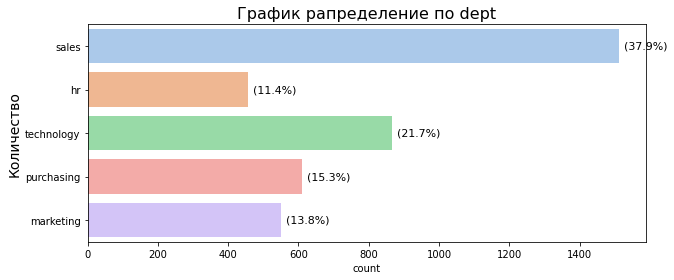

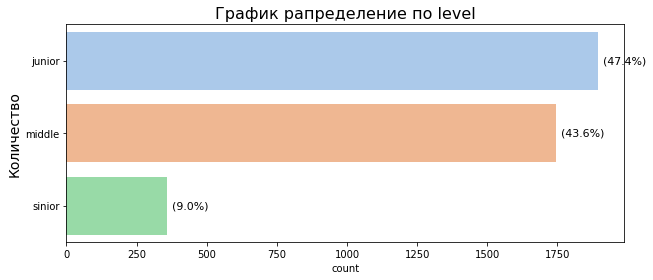

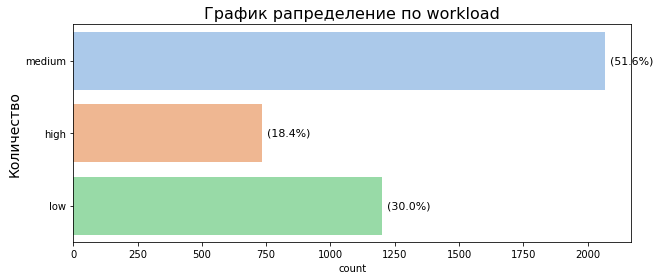

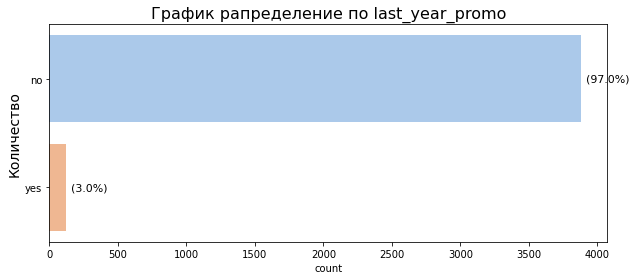

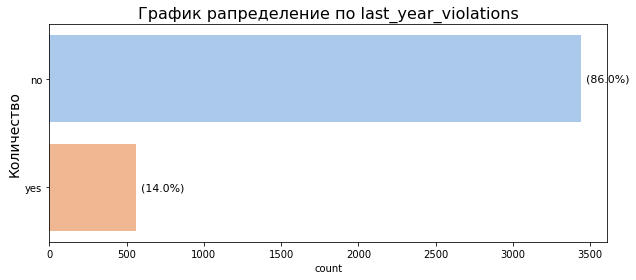

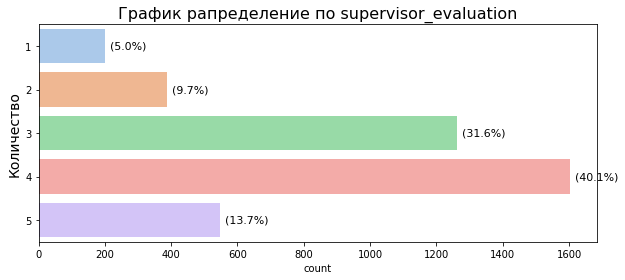

In [17]:
for i in categor:
    categoral(train_job, i)

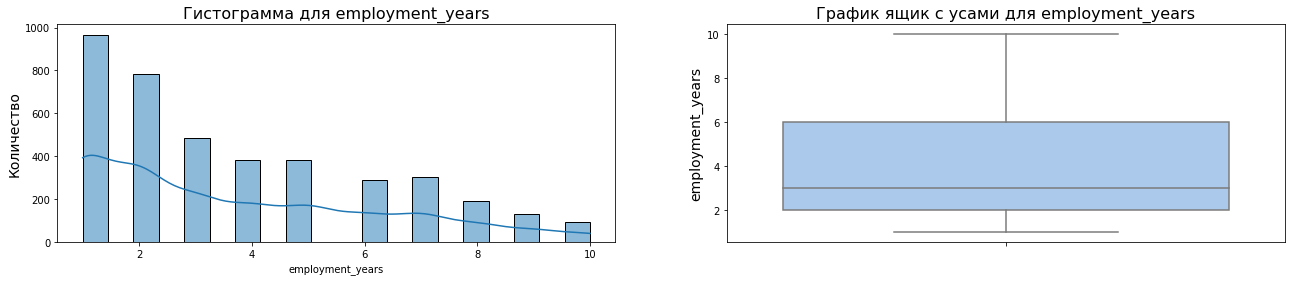

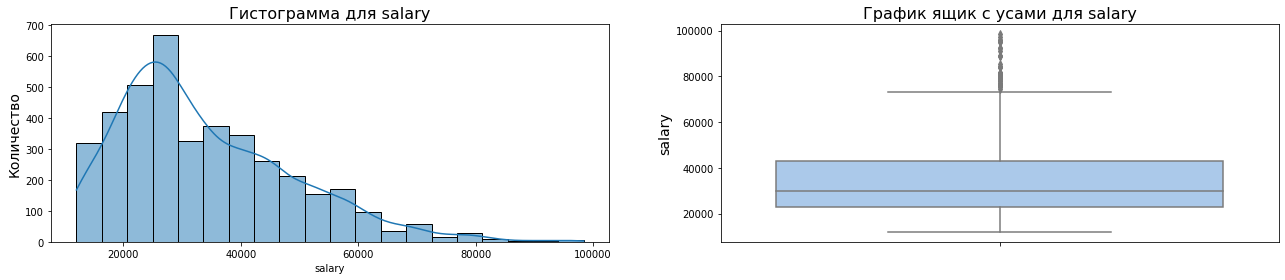

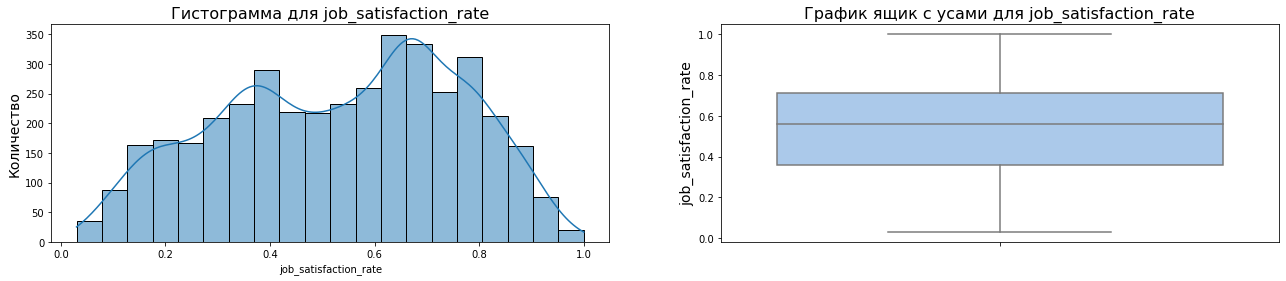

In [18]:
for i in num:
    hist_with_boxplot(train_job, i)

**Вывод** таким образом, проблем с данными нет, в целевом признаке не обнаружены выбросы, распределение имеет два пика (на уровне 0.4 и на уровне 0.7). Самая частая заработная плата находится на уровне 30.000 руб. Больше всего работников, которые проработали в компании 1 год.

Объединим датасеты 'test_features' и 'test_target_job'.

In [19]:
test_features.shape[0]

2000

In [20]:
test_target_job.shape[0]

2000

In [21]:
merge_test = pd.merge(test_features, test_target_job, on = 'id', how='inner')

In [22]:
merge_test.shape[0]

2000

In [23]:
test_features.isna().sum()

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

In [24]:
merge_test.isna().sum()

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

Таблицы успешно объединены. Количество пропусков не изменилось, количество строк тоже осталось прежним.

Для датасета 'merge_test'.

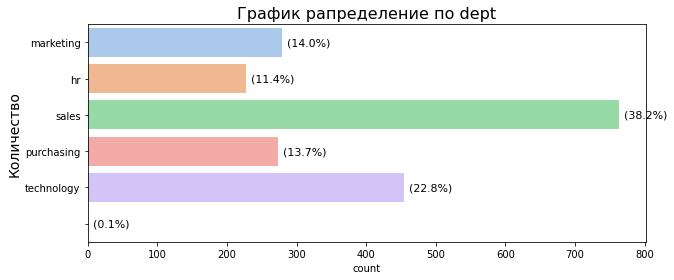

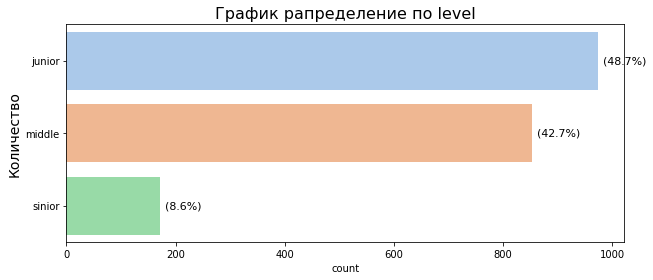

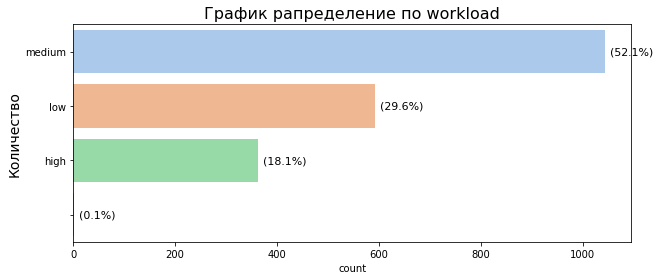

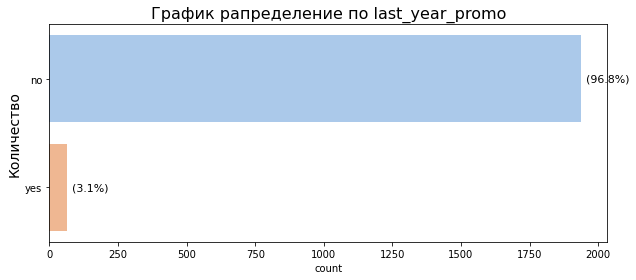

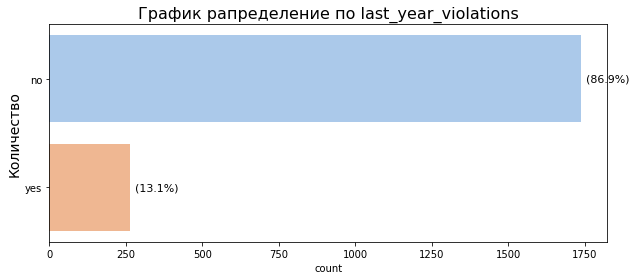

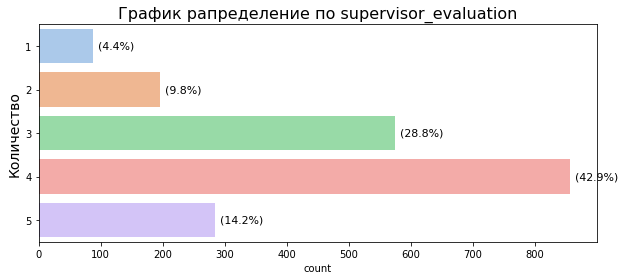

In [25]:
for i in categor:
    categoral(merge_test, i)

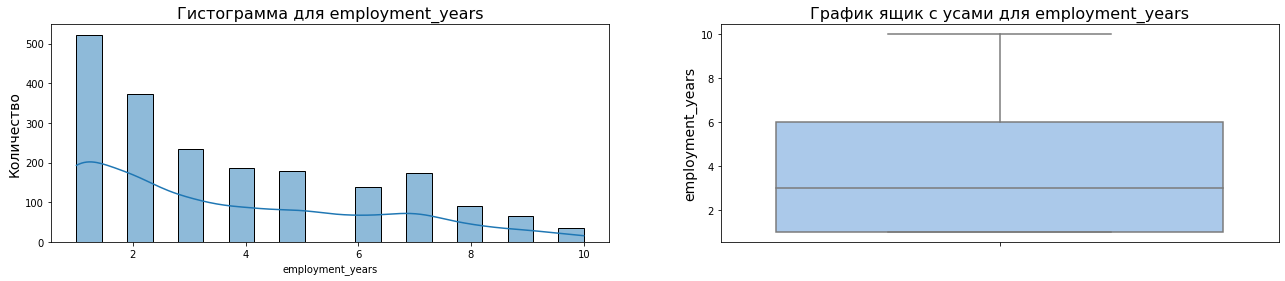

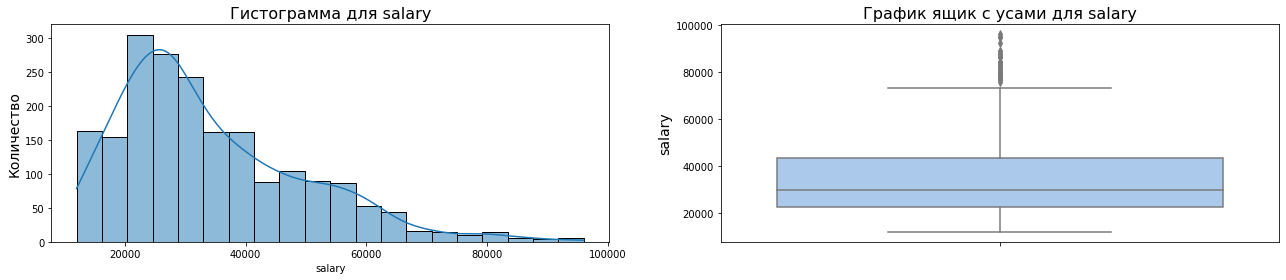

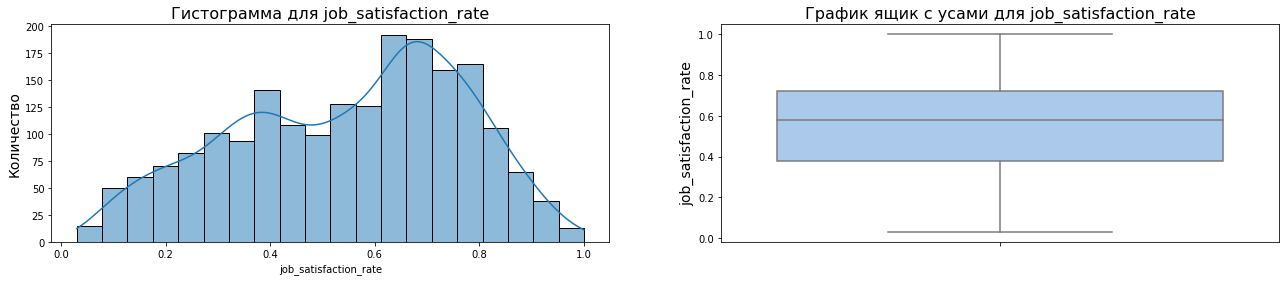

In [26]:
for i in num:
    hist_with_boxplot(merge_test, i)

**Вывод:**  данные из тестового датасета также впорядке. Пропуски будут обработаны на этапе составления паплайнов.

## Корреляционный анализ данных
<a id='4-bullet'></a>

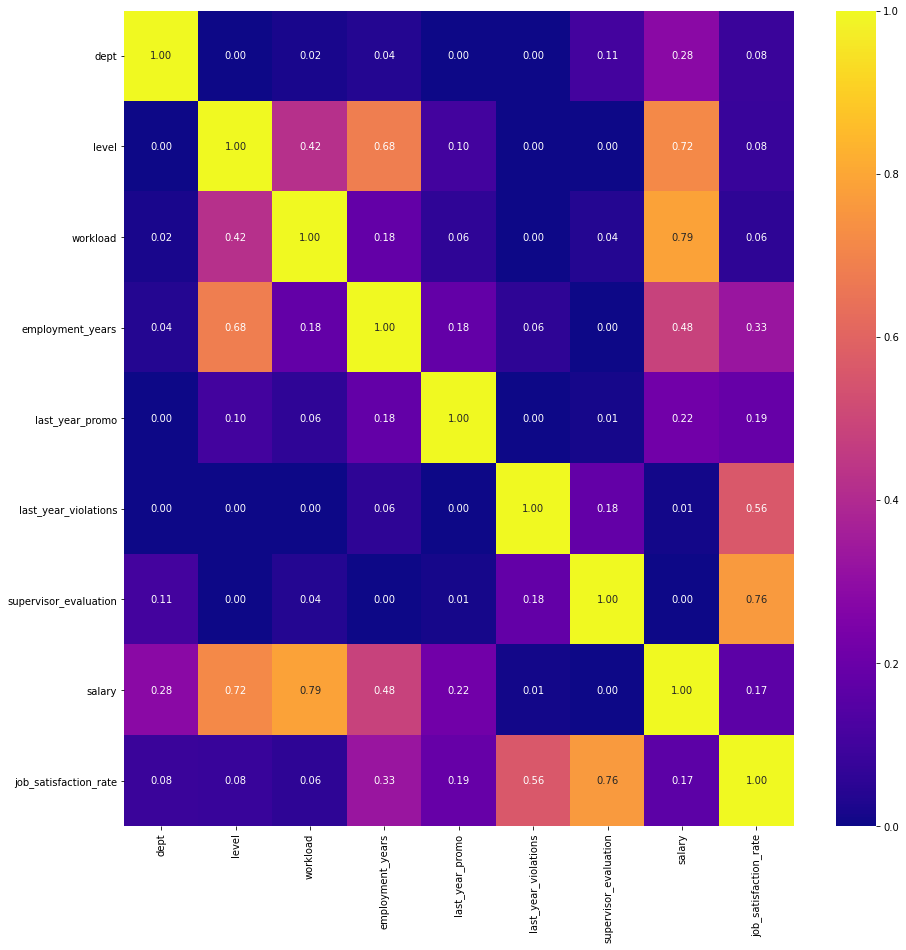

In [27]:
fig, ax = plt.subplots(figsize=(15, 15))
train_job_without_id = train_job.drop(columns=['id'])
sns.heatmap(train_job_without_id.phik_matrix(interval_cols = ['employment_years', 'supervisor_evaluation', 'salary',\
                                                                'job_satisfaction_rate']), annot=True, fmt='.2f', cmap='plasma'
)
plt.show()

**Вывод:** есть корреляция между уровнем удовлетворённости сотрудника и нарушением трудового договора, оценкой качества работы сотрудника, которую дал руководитель. Также отсутствуют признаки, которые имеют корреляцию больше 0.9, Значит мы можем говорить об отсутствии мультиколлинеарности.

## Подготовка данных к обучению и обучение модели
<a id='5-bullet'></a>

In [28]:
train_job.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


- Целевой признак 'job_satisfaction_rate' трогать не будем, так как у нас задача не классификации и необходимо предсказать значение.
- Признаки 'dept', 'last_year_promo', 'last_year_violations' закодируем с помощью OneHotEncoder.
- Признаки 'level', 'workload' порядковые, значит закодируем их с помощью OrdinalEncoder.
- Признаки 'employment_years', 'supervisor_evaluation', 'salary' отмасштабируем.

In [29]:
RANDOM_STATE = 100
X_train = train_job.drop(['job_satisfaction_rate', 'id'], axis=1)
y_train = train_job['job_satisfaction_rate']
X_test = merge_test.drop(['job_satisfaction_rate', 'id'], axis=1)
y_test = merge_test['job_satisfaction_rate']
X_train['dept'].unique()

array(['sales', 'hr', 'technology', 'purchasing', 'marketing', nan],
      dtype=object)

In [30]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']

In [31]:
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
#     ('simpleImputer_ohe_2', SimpleImputer(missing_values=' ', strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
)

In [32]:
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
#     ('simpleImputer_before_ord_2', SimpleImputer(missing_values=' ', strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'], 
                    ['low', 'medium', 'high']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),

    ]
)

In [33]:
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [34]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])

In [35]:
param_grid = [

    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(5, 20),
        'models__max_features': range(5, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

In [36]:
def smape(y_true, y_pred):
    """
    Функция для расчета метрики SMAPE.
    y_true - целевой признак из датасета
    y_pred - предсказанные значения
    """
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))
   
smape_scorer = make_scorer(score_func=smape, greater_is_better=False)

In [37]:
grid_search = GridSearchCV(
    pipe_final,
    param_grid,
    n_jobs=-1,
    cv=5,
    scoring=smape_scorer
)

In [38]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['dept',
                                                                          'last_year_promo',
                                                                          'last_year_violations']),
                                                                        ('ord',
                                                                         Pipeline(...
             param_grid=[{'models': [LinearRegression()],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']},
                         {'models': [DecisionTreeRegressor(random_state=100)],
                          'models__max_depth': range(5, 20),
                          'models__max_features': range(5, 20),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']}],
             scoring=make_scorer(smape, greater_is_better=False, response_method='predict'))

In [39]:
results = pd.DataFrame(grid_search.cv_results_)
top_10 = results.sort_values(by='mean_test_score', ascending=False).head(10)
print('Лучшая модель и её параметры:\n\n', grid_search.best_estimator_)
display('Топ 10 моделей', top_10[['rank_test_score', 'mean_test_score', 'std_test_score', 'params']])

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

'Топ 10 моделей'

,rank_test_score,mean_test_score,std_test_score,params
425,1,-14.836959,0.305438,{'models': DecisionTreeRegressor(random_state=...
424,2,-14.838552,0.308293,{'models': DecisionTreeRegressor(random_state=...
423,3,-14.846248,0.312251,{'models': DecisionTreeRegressor(random_state=...
378,4,-15.123345,0.286505,{'models': DecisionTreeRegressor(random_state=...
379,5,-15.128413,0.289995,{'models': DecisionTreeRegressor(random_state=...
380,6,-15.140103,0.274485,{'models': DecisionTreeRegressor(random_state=...
382,7,-15.142439,0.337558,{'models': DecisionTreeRegressor(random_state=...
391,7,-15.142439,0.337558,{'models': DecisionTreeRegressor(random_state=...
406,7,-15.142439,0.337558,{'models': DecisionTreeRegressor(random_state=...
394,7,-15.142439,0.337558,{'models': DecisionTreeRegressor(random_state=...


Таким образом, самый лучший результат на тренеровочной выборке показала модель DecisionTreeRegressor(max_depth=14, max_features=10, random_state=100). Метрика на кросс-валидации = 14.8.

In [40]:
y_pred = grid_search.predict(X_test)
print(f'Метрика SMAPE на тестовой выборке: {smape(y_test, y_pred)}')

Метрика SMAPE на тестовой выборке: 13.971097173287347


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


**Вывод:**
- была отобрана лучшая модель для предсказания целевого признака DecisionTreeRegressor(max_depth=14, max_features=10, random_state=100);
- результат метрики SMAPE на тренеровочных данных 14.8;
- результат метрики на тестовых данных 14.

# Задача № 2
<a id='section_2'></a>

## Загрузка данных и первичное ознакомление
<a id='6-bullet'></a>

In [41]:
# пути загружаемых датасетов
pth1 = '/datasets/train_quit.csv'
pth2 = '/datasets/test_target_quit.csv'

# проверка пути к загружаемым датасетам
if os.path.exists(pth1):
    #загрузка данных из файла 'train_quit.csv'
    train_quit = pd.read_csv(pth1)
    # отобразим загруженные датасеты
    display(train_quit.head())
else:
    print(f"Не верный путь к файлу: {pth1}")
if os.path.exists(pth2):
    #загрузка данных из файла 'test_target_quit.csv'
    test_target_quit = pd.read_csv(pth2)
    # отобразим загруженные датасеты
    display(test_target_quit.head())
else:
    print(f"Не верный путь к файлу: {pth2}")

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


Данные успешно загружены.

In [42]:
# применение функции studying_dataset_data к датасету train_quit
train_quit.columns = studying_dataset_data(train_quit, train_quit.columns)
display(train_quit.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB
None


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [43]:
# применение функции studying_dataset_data к датасету test_target_quit
test_target_quit.columns = studying_dataset_data(test_target_quit, test_target_quit.columns)
display(test_target_quit.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB
None


,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


**Вывод:** в данных отсутствуют пропуски. Типы данных в норме. Столбцы были приведены к змеиному регистру, пробелы в названиях столбцов заменены на нижнее подчеркивание.

## Предобработка данных
<a id='7-bullet'></a>

In [44]:
train_quit = data_duplicate(train_quit)

Количество дубликатов в датасете:  0 

Столбец 'dept': 
 ['sales' 'purchasing' 'marketing' 'technology' 'hr']
Столбец 'level': 
 ['middle' 'junior' 'sinior']
Столбец 'workload': 
 ['high' 'medium' 'low']
Столбец 'last_year_promo': 
 ['no' 'yes']
Столбец 'last_year_violations': 
 ['no' 'yes']
Столбец 'quit': 
 ['no' 'yes']


In [45]:
test_target_quit = data_duplicate(test_target_quit)

Количество дубликатов в датасете:  0 

Столбец 'quit': 
 ['yes' 'no']


**Вывод** таким образом, все значения типа данных 'object' приведены к змеиному регистру, явные дубликаты не обнаружены, неявные дубликаты тоже отсутствуют. 

## Исследовательский анализ данных
<a id='8-bullet'></a>

In [46]:
# столбцы для построения гистограммы
categor = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'supervisor_evaluation', 'quit']
num = ['employment_years', 'salary']

Для датасета 'train_quit'.

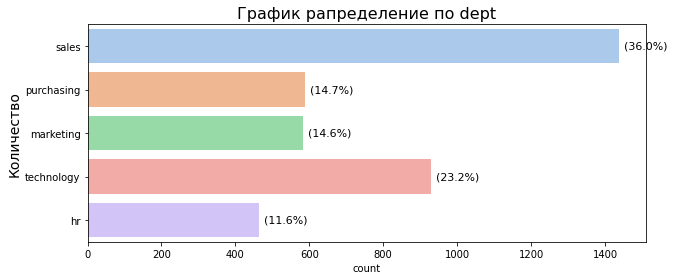

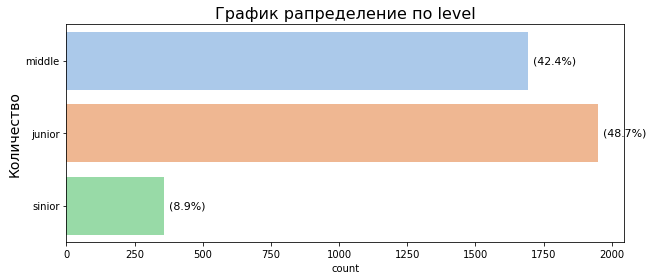

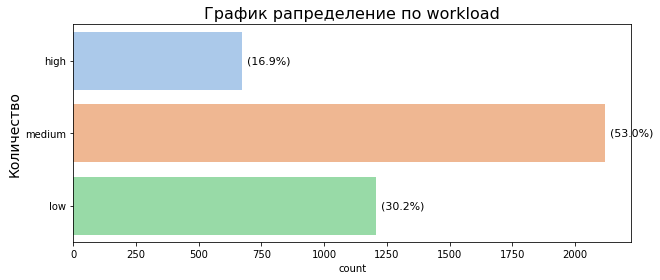

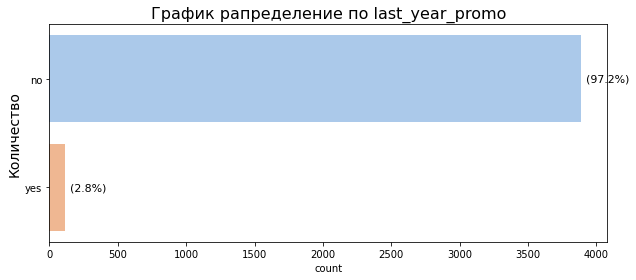

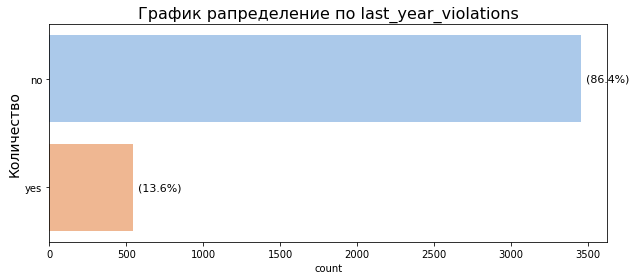

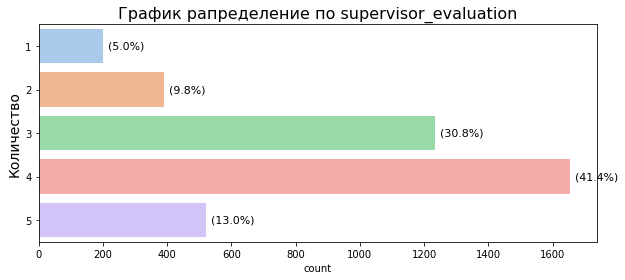

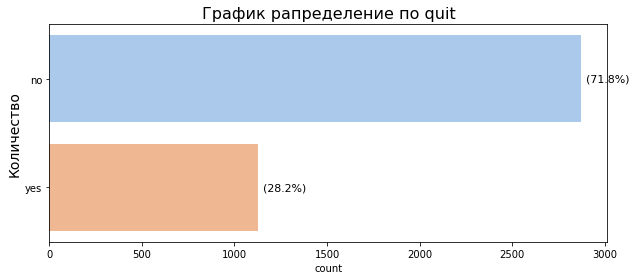

In [47]:
for i in categor:
    categoral(train_quit, i)

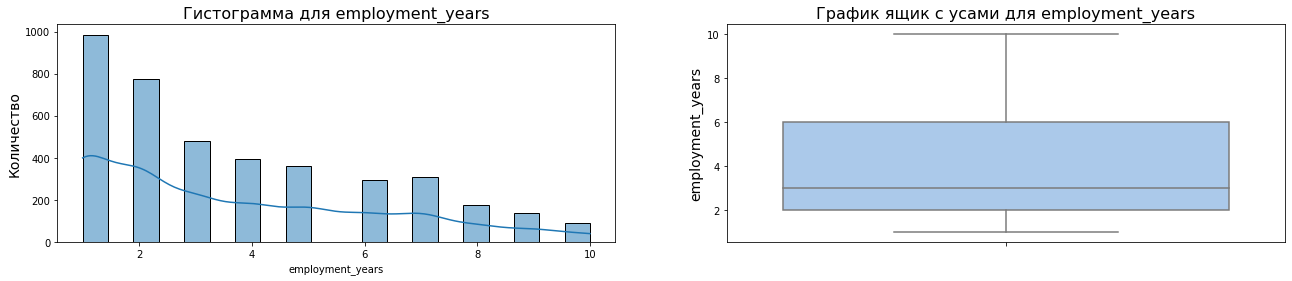

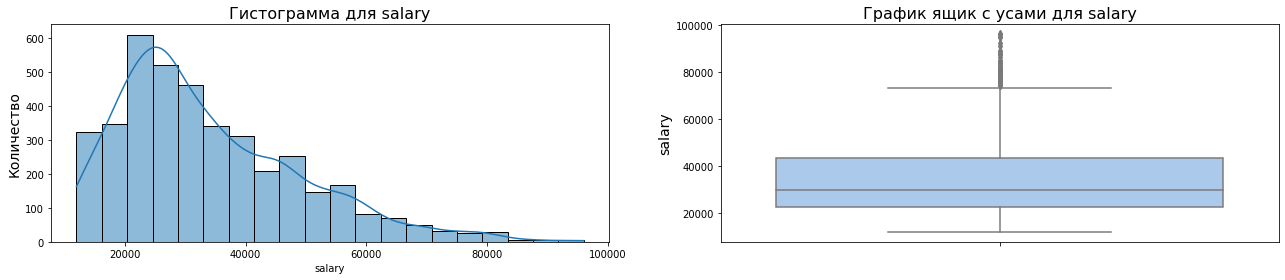

In [48]:
for i in num:
    hist_with_boxplot(train_quit, i)

**Вывод** таким образом, проблем с данными нет. Целевой признак имеет дисбаланс, поэтому будем применять метрику ROC-AUC.

Объединим датасеты 'test_features' и 'test_target_quit'.

In [49]:
test_features.shape[0]

2000

In [50]:
test_target_quit.shape[0]

2000

In [51]:
merge_test_quit = pd.merge(test_features, test_target_quit, on = 'id', how='inner')

In [52]:
merge_test_quit.shape[0]

2000

Таблицы успешно объединены. Количество строк тоже осталось прежним.

Для датасета 'merge_test_quit'.

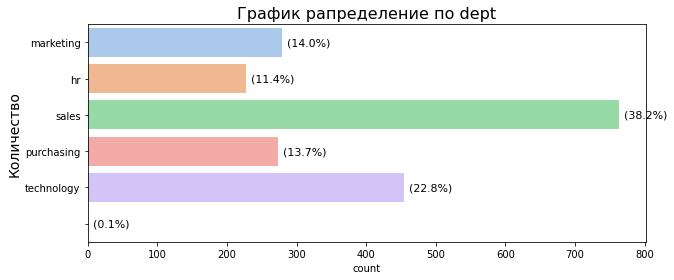

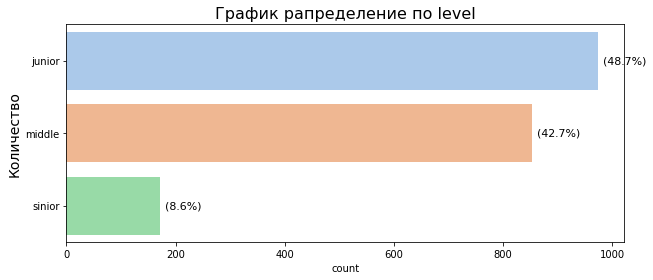

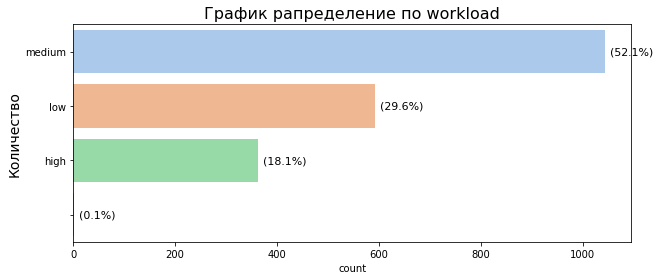

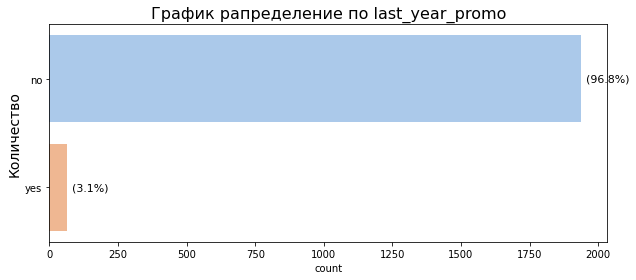

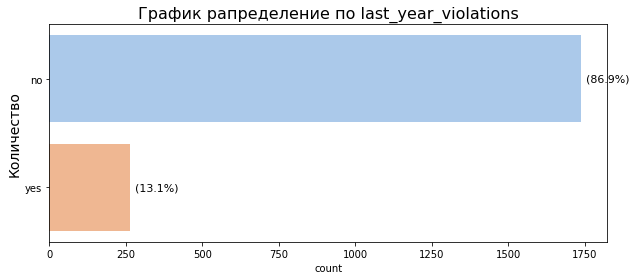

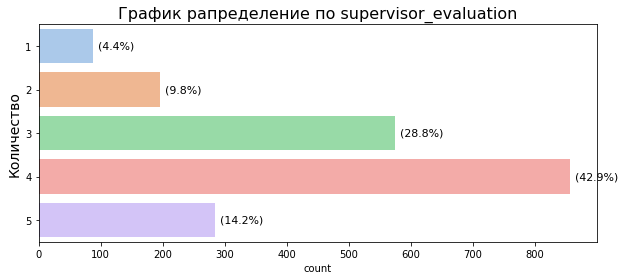

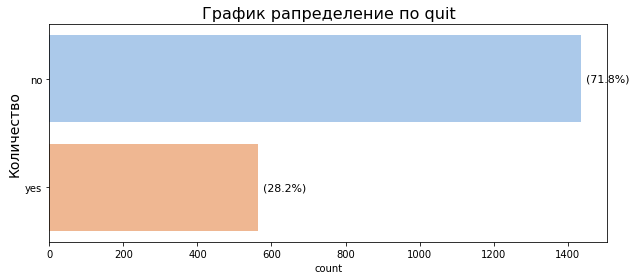

In [53]:
for i in categor:
    categoral(merge_test_quit, i)

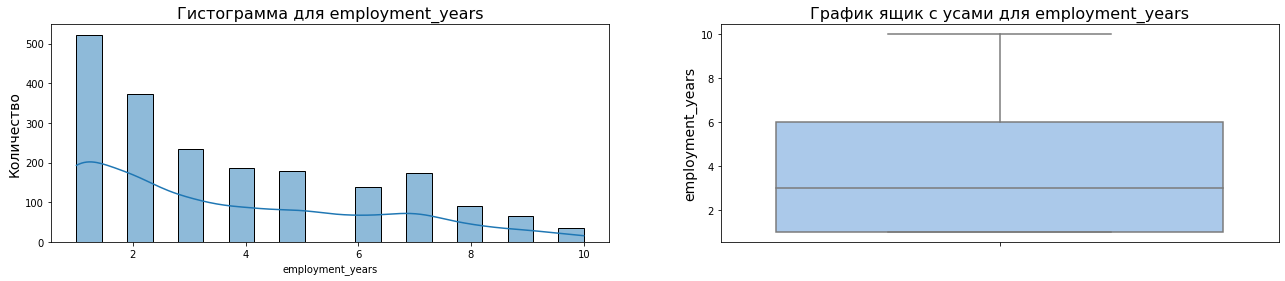

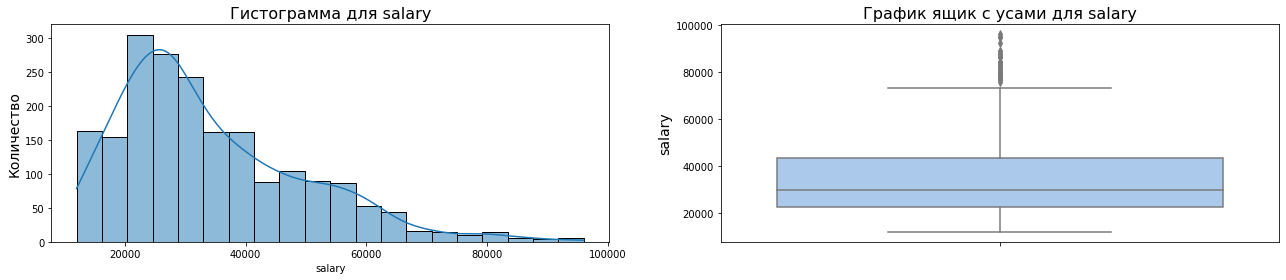

In [54]:
for i in num:
    hist_with_boxplot(merge_test_quit, i)

**Вывод:**  данные из тестового датасета также впорядке.

Составим портрет уволившегося сотрудника.

In [55]:
train_quit_learning = train_quit[train_quit['quit'] == 'yes']

In [56]:
train_quit_learning.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
5,699916,sales,junior,low,1,no,yes,3,18000,yes
9,613206,technology,middle,medium,2,no,no,3,45600,yes
24,468145,technology,junior,medium,2,no,no,3,30000,yes
25,982346,marketing,junior,medium,3,no,no,3,30000,yes


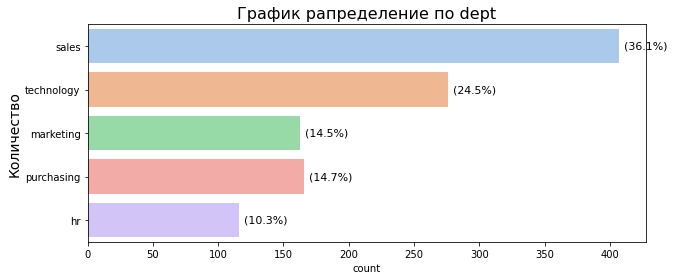

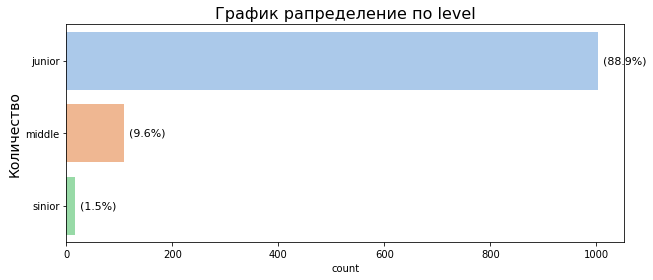

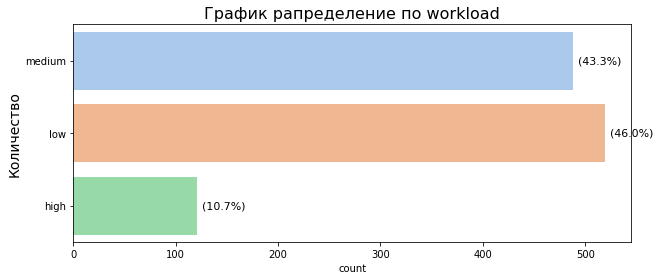

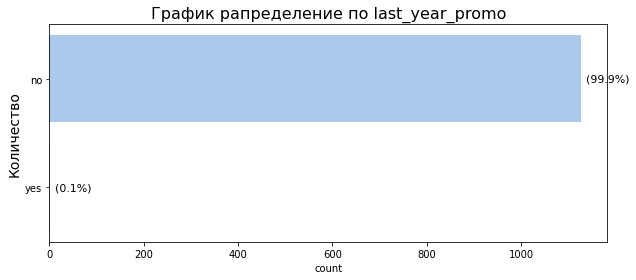

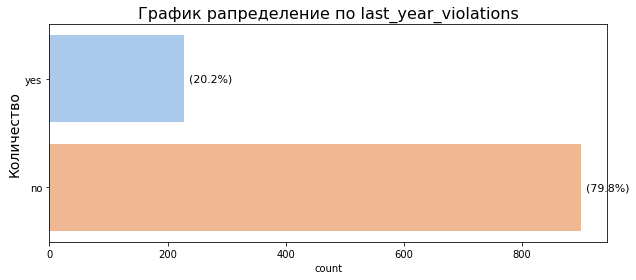

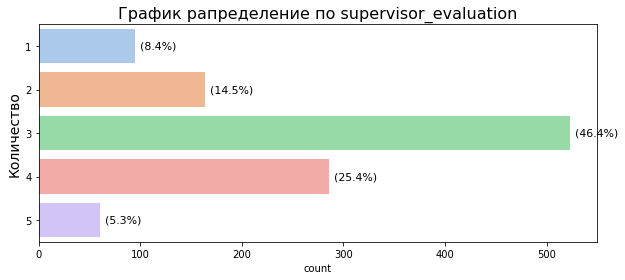

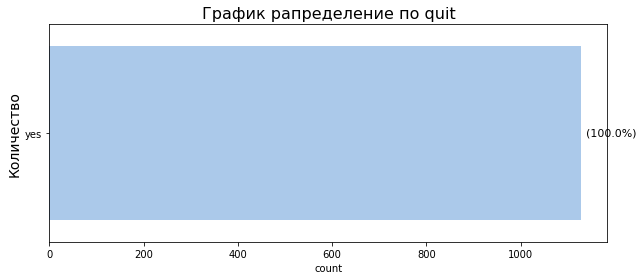

In [57]:
for i in categor:
    categoral(train_quit_learning, i)

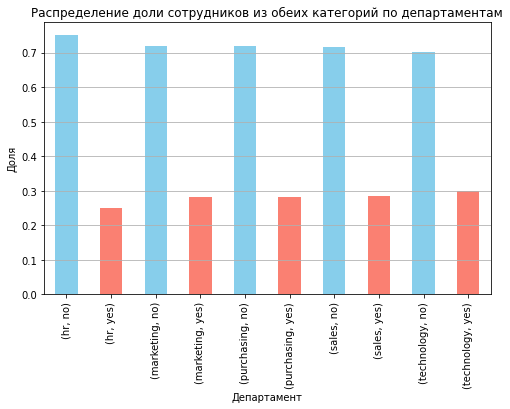

In [58]:
result = train_quit.groupby(['dept'])['quit'].value_counts(normalize=True)
result.plot(kind='bar', stacked=True, figsize=(8, 5), color=['skyblue', 'salmon'])

plt.xlabel('Департамент')
plt.ylabel('Доля')
plt.title('Распределение доли сотрудников из обеих категорий по департаментам')
plt.grid(True, axis='y')

plt.show()

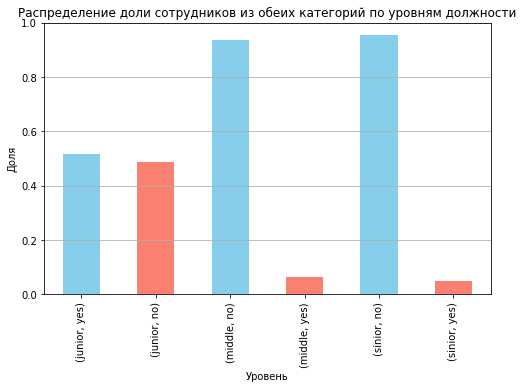

In [59]:
result = train_quit.groupby(['level'])['quit'].value_counts(normalize=True)
result.plot(kind='bar', stacked=True, figsize=(8, 5), color=['skyblue', 'salmon'])

plt.xlabel('Уровень')
plt.ylabel('Доля')
plt.title('Распределение доли сотрудников из обеих категорий по уровням должности')
plt.grid(True, axis='y')

plt.show()

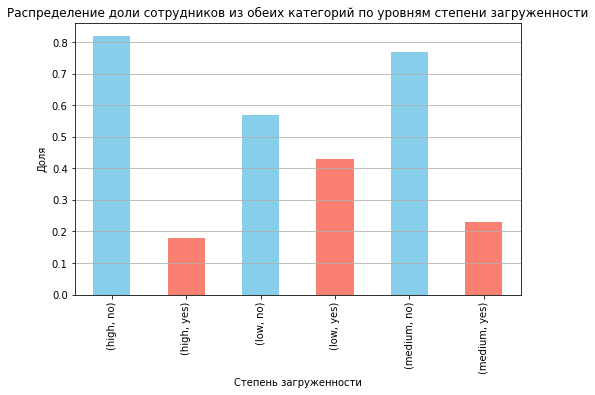

In [60]:
result = train_quit.groupby(['workload'])['quit'].value_counts(normalize=True)
result.plot(kind='bar', stacked=True, figsize=(8, 5), color=['skyblue', 'salmon'])

plt.xlabel('Степень загруженности')
plt.ylabel('Доля')
plt.title('Распределение доли сотрудников из обеих категорий по уровням степени загруженности')
plt.grid(True, axis='y')

plt.show()

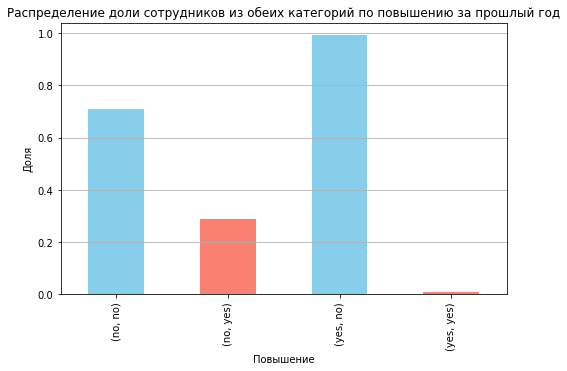

In [61]:
result = train_quit.groupby(['last_year_promo'])['quit'].value_counts(normalize=True)
result.plot(kind='bar', stacked=True, figsize=(8, 5), color=['skyblue', 'salmon'])

plt.xlabel('Повышение')
plt.ylabel('Доля')
plt.title('Распределение доли сотрудников из обеих категорий по повышению за прошлый год')
plt.grid(True, axis='y')

plt.show()

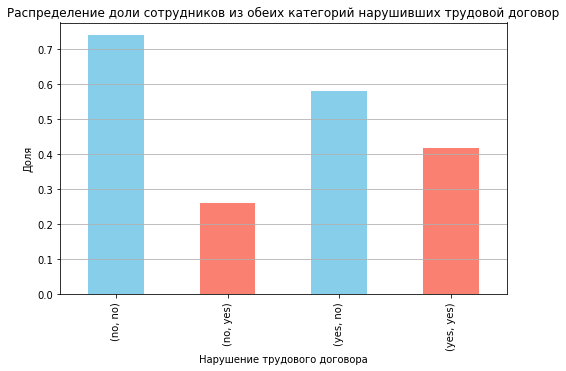

In [62]:
result = train_quit.groupby(['last_year_violations'])['quit'].value_counts(normalize=True)
result.plot(kind='bar', stacked=True, figsize=(8, 5), color=['skyblue', 'salmon'])

plt.xlabel('Нарушение трудового договора')
plt.ylabel('Доля')
plt.title('Распределение доли сотрудников из обеих категорий нарушивших трудовой договор')
plt.grid(True, axis='y')

plt.show()

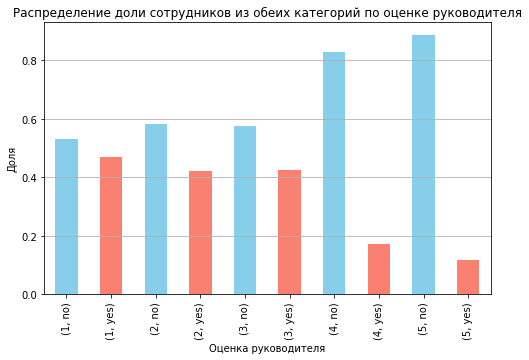

In [63]:
result = train_quit.groupby(['supervisor_evaluation'])['quit'].value_counts(normalize=True)
result.plot(kind='bar', stacked=True, figsize=(8, 5), color=['skyblue', 'salmon'])

plt.xlabel('Оценка руководителя')
plt.ylabel('Доля')
plt.title('Распределение доли сотрудников из обеих категорий по оценке руководителя')
plt.grid(True, axis='y')

plt.show()

Таким образом, увольняются сотрудники из каждого департамента примерно в равно отношении. Также чаще увольняются сотрудники, которых хуже оценивает руководство. Среди сотрудников с низкой нагрузкой почти половина увольняется, а вот у сотрудников с высокой и средний нагрузкой частота увольнений меньше. Сотрудники на позиции junior увольняются в соотношении 1:1, сотрудники на позициях выше остаются в компании намного чаще.

In [64]:
print('Средняя заработная плата сотрудников, которые уволились: ', train_quit[train_quit['quit'] == 'yes']['salary'].mean())
print('Средняя заработная плата сотрудников, которые не уволились: ', train_quit[train_quit['quit'] == 'no']['salary'].mean())

Средняя заработная плата сотрудников, которые уволились:  23885.106382978724
Средняя заработная плата сотрудников, которые не уволились:  37702.22841225627


**Вывод:** 
- в среднем зарплата уволившихся сотрудников на 15.000 меньше
- чаще всего увольняются сотрудники из отдела продаж
- сотрудники на позиции junior чаще всего покидают работу
- также эти сотрудники имеют уровень загруженности низкий или средний 
- у этих сотрудников не было повышения за последний год
- люди получающие от начальство оценку 3 по пятибальной шкале

In [65]:
def hist(dаta, col, target):
    """
    Функция построения графиков
    data - обрабатываемый датасет
    col - признаки, для которых строятся графики
    target - целевая переменная
    """
    f, ax = plt.subplots(1, 2, figsize=(22, 4))
    ax[0].set_title(f'Гистограмма для {col}', fontsize=16)
    ax[0].set_ylabel('Количество', fontsize=14)
    if target != None:
        sns.histplot(dаta, bins=20, kde=True, ax=ax[0], hue=target, x=col, palette='pastel')
    else:
        sns.histplot(dаta, bins=20, kde=True, ax=ax[0], x=col, palette='pastel')
    ax[1].set_title(f'График ящик с усами для {col}', fontsize=16)
    sns.boxplot(data=dаta, ax=ax[1], y=col, palette='pastel')
    ax[1].set_ylabel(col, fontsize=14)
    plt.show()

In [66]:
merge_graf = pd.merge(test_target_job, test_target_quit, on = 'id', how='inner')

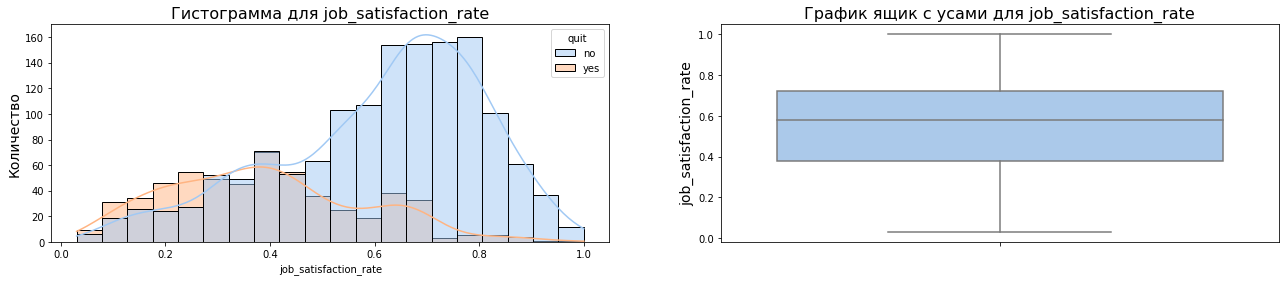

In [67]:
hist(merge_graf, 'job_satisfaction_rate', 'quit')

По графику заметно, что уволившиеся сотрудники не были удовлетворены работой, в отличие от оставшихся сотрудников. Таким образом, степень удовлетворенности сотрудника своей работой влияет на его увольнение. Добавим признак 'job_satisfaction_rate' в датасеты.

In [68]:
train_quit['job_satisfaction_rate'] = train_job['job_satisfaction_rate']
merge_test_quit['job_satisfaction_rate'] = np.round(y_pred, 2)

Для тренеровочной выборки мы будем использовать данные тренеровочной выборки 1 задачи. А для тестовой выборки будем использовать предсказанные значения в 1 задаче.

## Корреляционный анализ данных
<a id='9-bullet'></a>

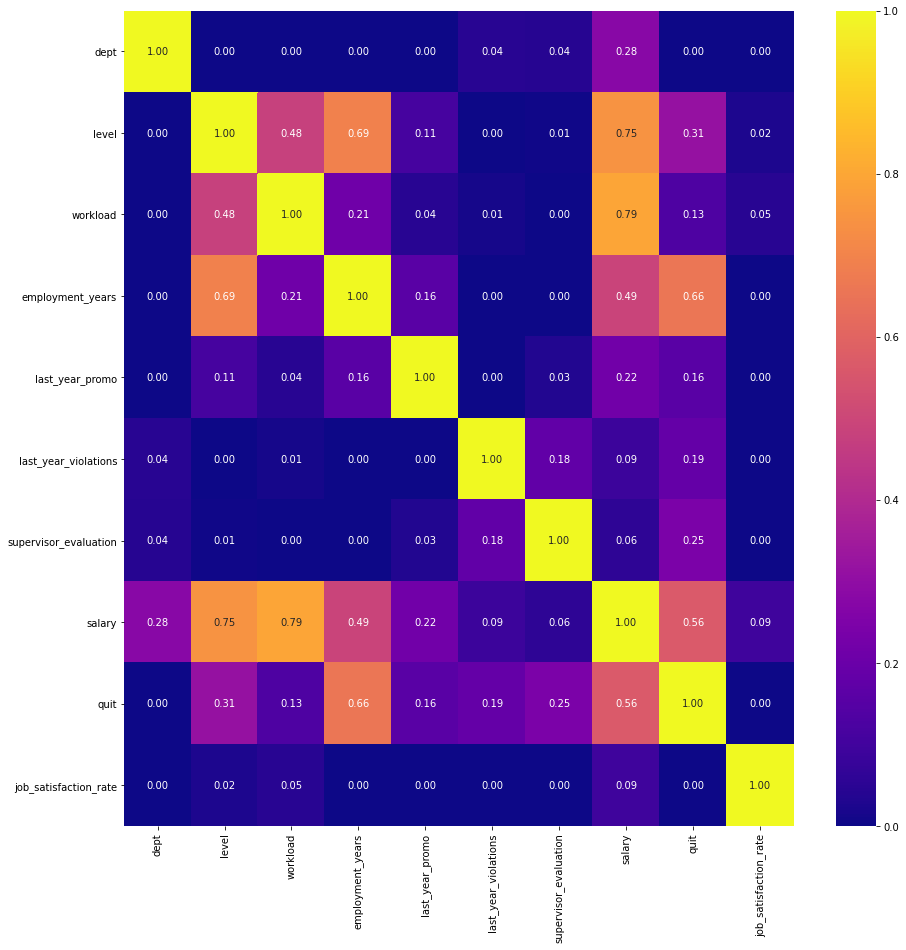

In [69]:
fig, ax = plt.subplots(figsize=(15, 15))
train_job_without_id = train_quit.drop(columns=['id'])
sns.heatmap(train_job_without_id.phik_matrix(interval_cols = ['employment_years', 'supervisor_evaluation', 'salary',\
                                                                'job_satisfaction_rate']), annot=True, fmt='.2f', cmap='plasma'
)
plt.show()

**Вывод:** есть корреляция между увольнением сотрудника и количеством проработанных лет, зараотной платой. Также отсутствуют признаки, которые имеют корреляцию больше 0.9, Значит мы можем говорить об отсутствии мультиколлинеарности.

## Подготовка данных к обучению и обучение модели
<a id='10-bullet'></a>

In [70]:
train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,no,0.58
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.76
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.11
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.37
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.20


- Целевой признак 'quit' закодируем с помощью LableEncoder.
- Признаки 'dept', 'last_year_promo', 'last_year_violations' закодируем с помощью OneHotEncoder.
- Признаки 'level', 'workload' порядковые, значит закодируем их с помощью OrdinalEncoder.
- Признаки 'employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate' отмасштабируем.

In [71]:
RANDOM_STATE = 100
X_train = train_quit.drop(['quit', 'id'], axis=1)
y_train = train_quit['quit']
X_test = merge_test_quit.drop(['quit', 'id'], axis=1)
y_test = merge_test_quit['quit']

In [72]:
# создание экземпляра класса LabelEncoder для кодирования целевого признака
label_encoder = LabelEncoder()

# обучение модель и трансформирование тренировочной выборки
y_train = label_encoder.fit_transform(y_train)

# трансформируем тестовую выборку
y_test = label_encoder.transform(y_test)

In [73]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

In [74]:
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('simpleImputer_ohe_2', SimpleImputer(missing_values=' ', strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
)

In [75]:
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('simpleImputer_before_ord_2', SimpleImputer(missing_values=' ', strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'], 
                    ['low', 'medium', 'high']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),

    ]
)

In [76]:
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [77]:

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', RandomForestClassifier())
])


In [78]:
param_grid = [

    {
        'models': [RandomForestClassifier()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(5, 20),
        'models__max_features': range(5, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(10, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    }
]


In [79]:
grid_search = GridSearchCV(
    pipe_final,
    param_grid,
    n_jobs=-1,
    cv=5,
    scoring='roc_auc'
)

In [80]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('simpleImputer_ohe_2',
                                                                                          SimpleImputer(missing_values=' ',
                                                                                                        strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_ou...
                                                'passthrough']},
                         {'models': [DecisionTreeClassifier(random_state=100)],
                          'models__max_depth': range(5, 20),
                          'models__max_features': range(5, 20),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']},
                         {'models': [KNeighborsClassifier()],
                          'models__n_neighbors': range(10, 20),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']}],
             scoring='roc_auc')

In [81]:
results = pd.DataFrame(grid_search.cv_results_)
top_10 = results.sort_values(by='mean_test_score', ascending=False).head(10)
print('Лучшая модель и её параметры:\n\n', grid_search.best_estimator_)
display('Топ 10 моделей', top_10[['rank_test_score', 'mean_test_score', 'std_test_score', 'params']])

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('simpleImputer_ohe_2',
                                                                   SimpleImputer(missing_values=' ',
                                                                                 strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                              

'Топ 10 моделей'

,rank_test_score,mean_test_score,std_test_score,params
1,1,0.927827,0.007108,"{'models': RandomForestClassifier(), 'preproce..."
0,2,0.927477,0.008752,"{'models': RandomForestClassifier(), 'preproce..."
2,3,0.927275,0.009423,"{'models': RandomForestClassifier(), 'preproce..."
37,4,0.925411,0.007180,{'models': DecisionTreeClassifier(random_state...
33,4,0.925411,0.007180,{'models': DecisionTreeClassifier(random_state...
32,4,0.925411,0.007180,{'models': DecisionTreeClassifier(random_state...
31,4,0.925411,0.007180,{'models': DecisionTreeClassifier(random_state...
30,4,0.925411,0.007180,{'models': DecisionTreeClassifier(random_state...
29,4,0.925411,0.007180,{'models': DecisionTreeClassifier(random_state...
28,4,0.925411,0.007180,{'models': DecisionTreeClassifier(random_state...


Таким образом, самый лучший результат на тренеровочной выборке показала модель RandomForestClassifier(). Метрика на кросс-валидации = 0.93.


In [82]:
y_pred = grid_search.predict(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])}')

Метрика ROC-AUC на тестовой выборке: 0.9275957397419942


**Вывод:**
- была отобрана лучшая модель для предсказания целевого признака RandomForestClassifier();
- результат метрики ROC-AUC на тренеровочных данных 0.93;
- результат метрики на тестовых данных 0.92.

# Общий вывод
<a id='section_3'></a>

**Задача № 1**
- данные загружны
- проведена подготовка данных
- проведено исследование данных
- по результатам поиска лучшей модели была выбрана следующая модель DecisionTreeRegressor(max_depth=14, max_features=10), значение её метрики на тестовых данных менее 15.

**Задача № 2**
- данные загружны
- проведена подготовка данных
- проведено исследование данных
- по результатам поиска лучшей модели была выбрана следующая модель RandomForestClassifier(), значение её метрики на тестовых данных более 0.91